# Assumptions of Linear Regression

Before we start working on Linear Regression : What we expect or pre assume with the data:

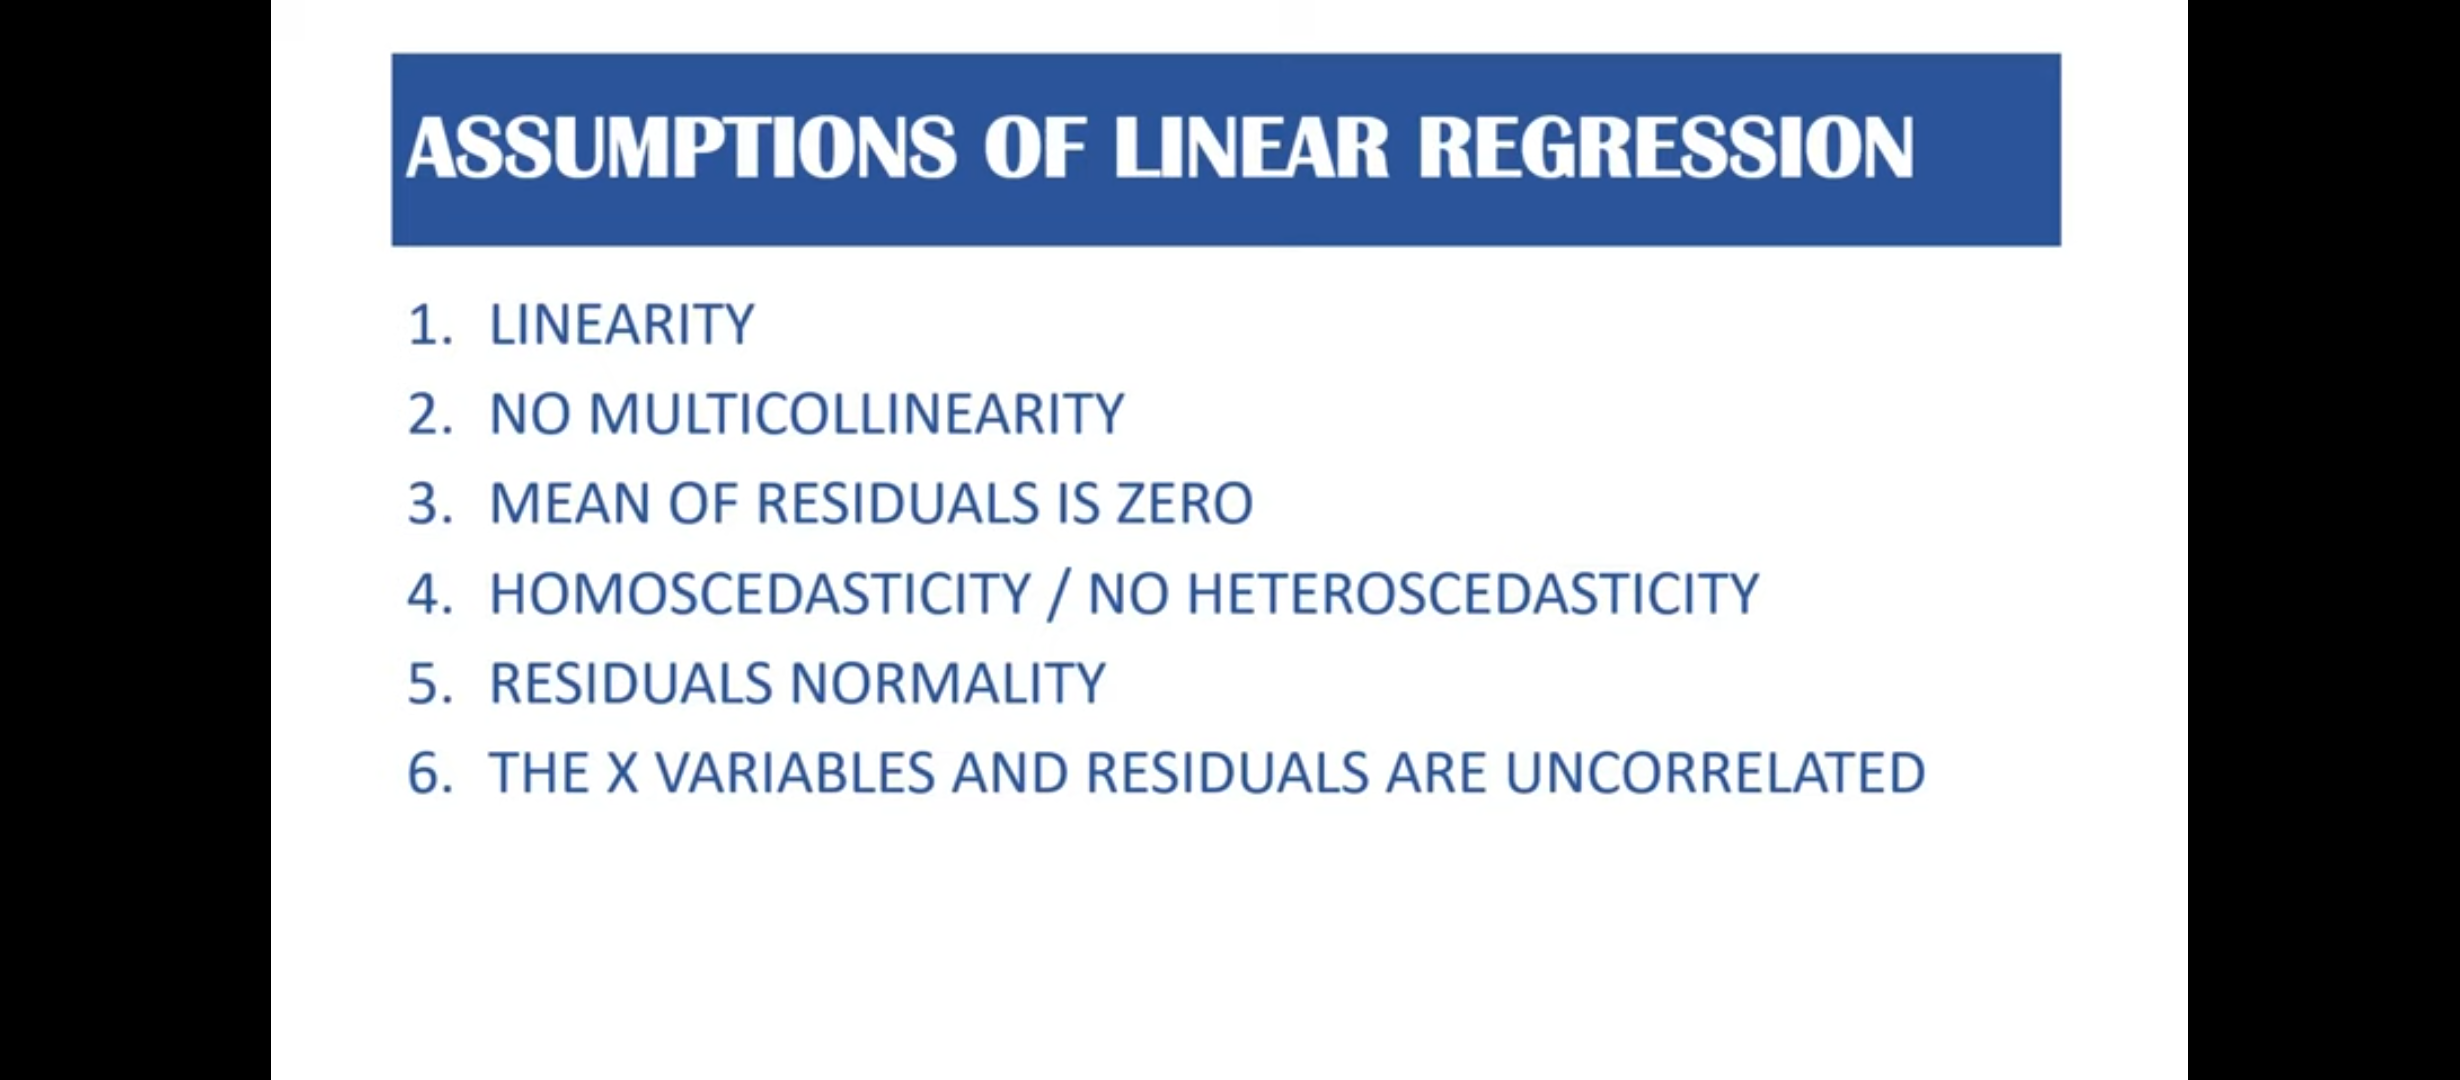

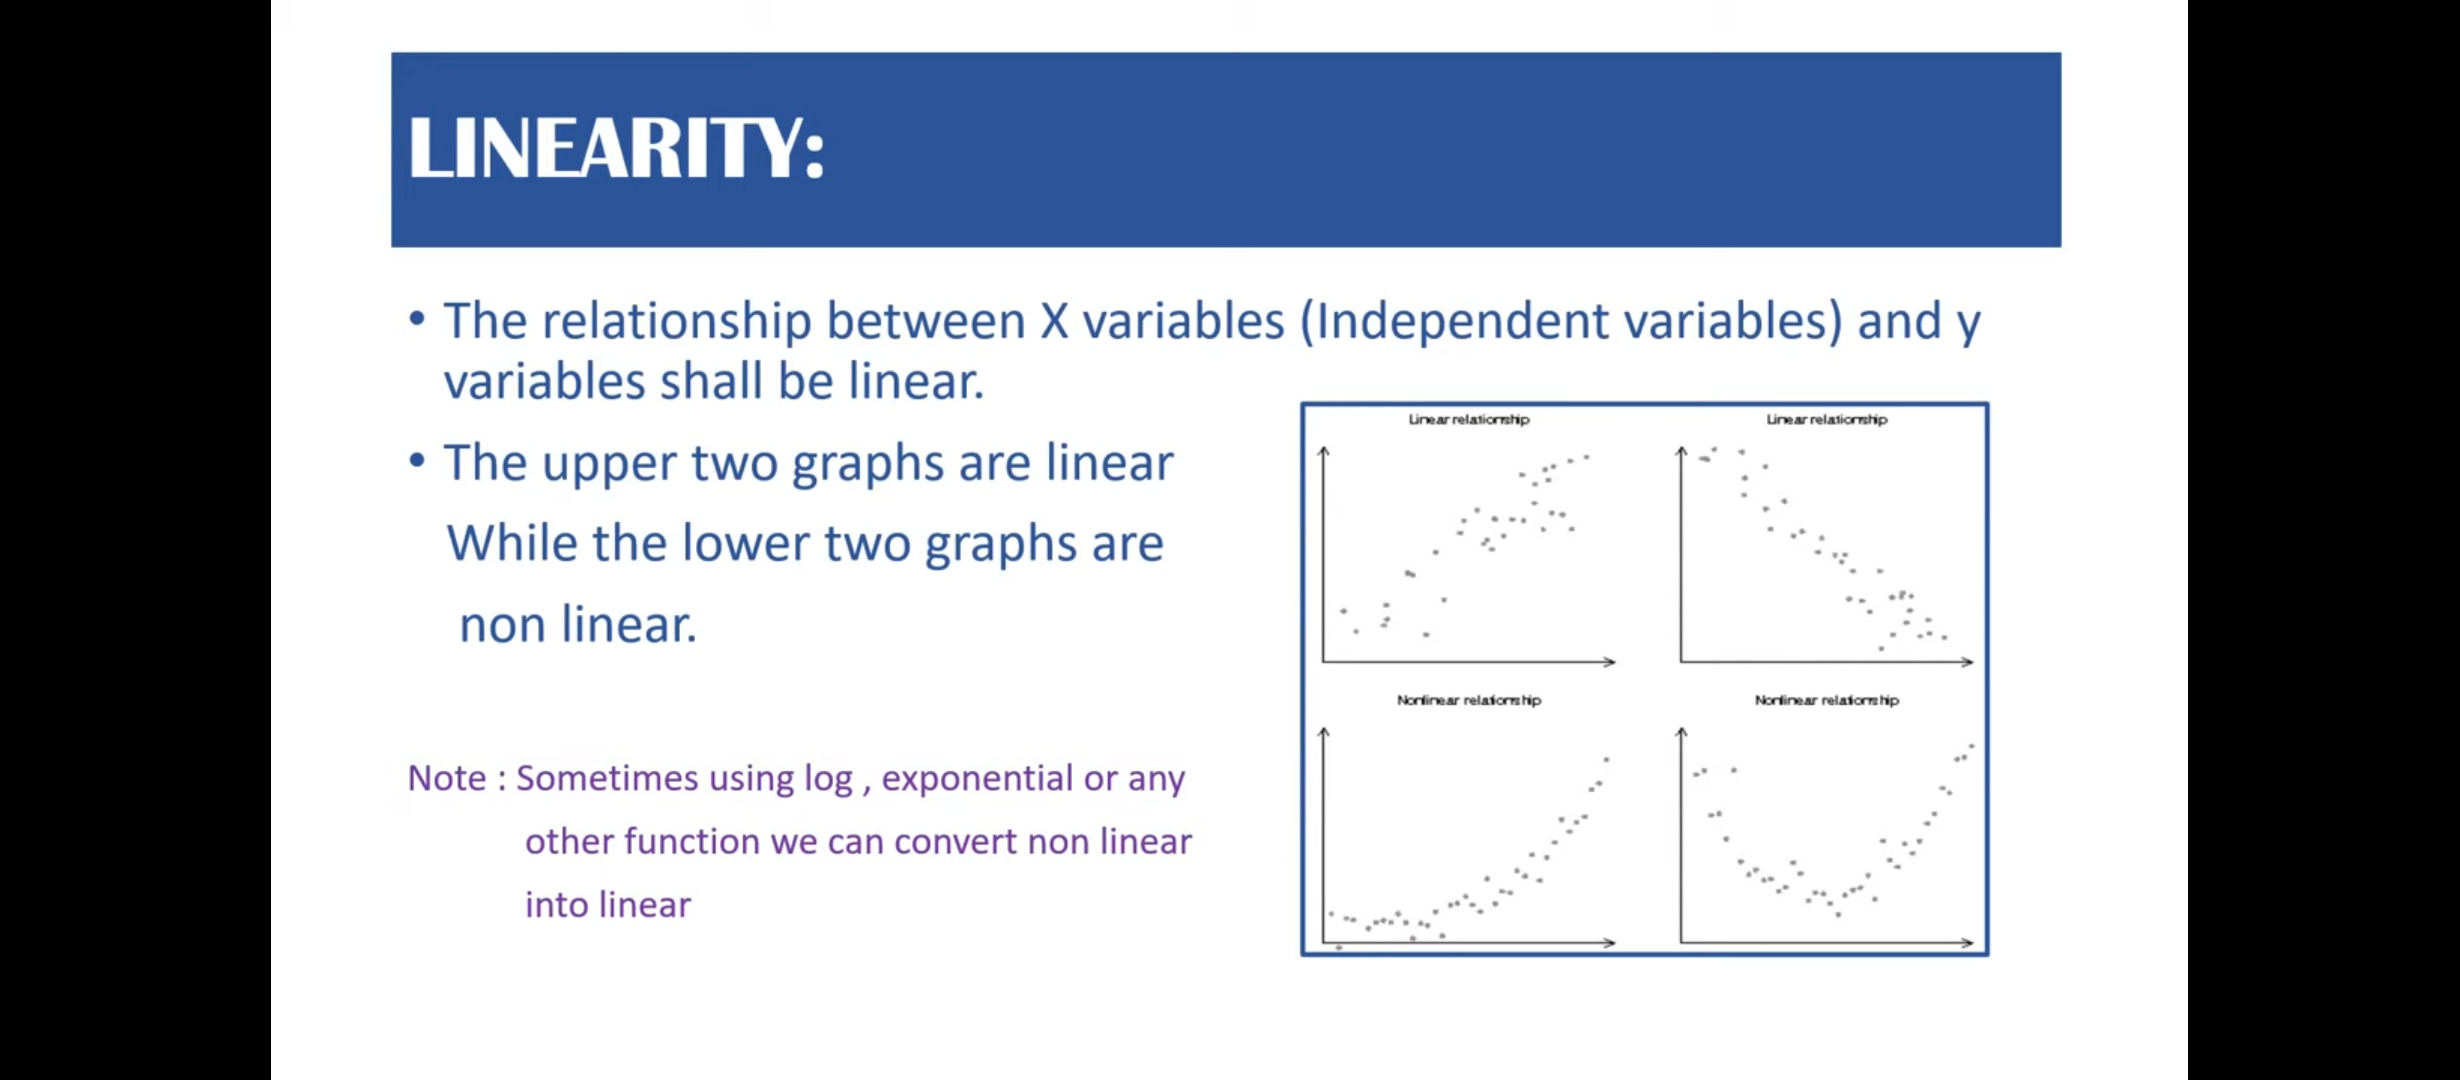

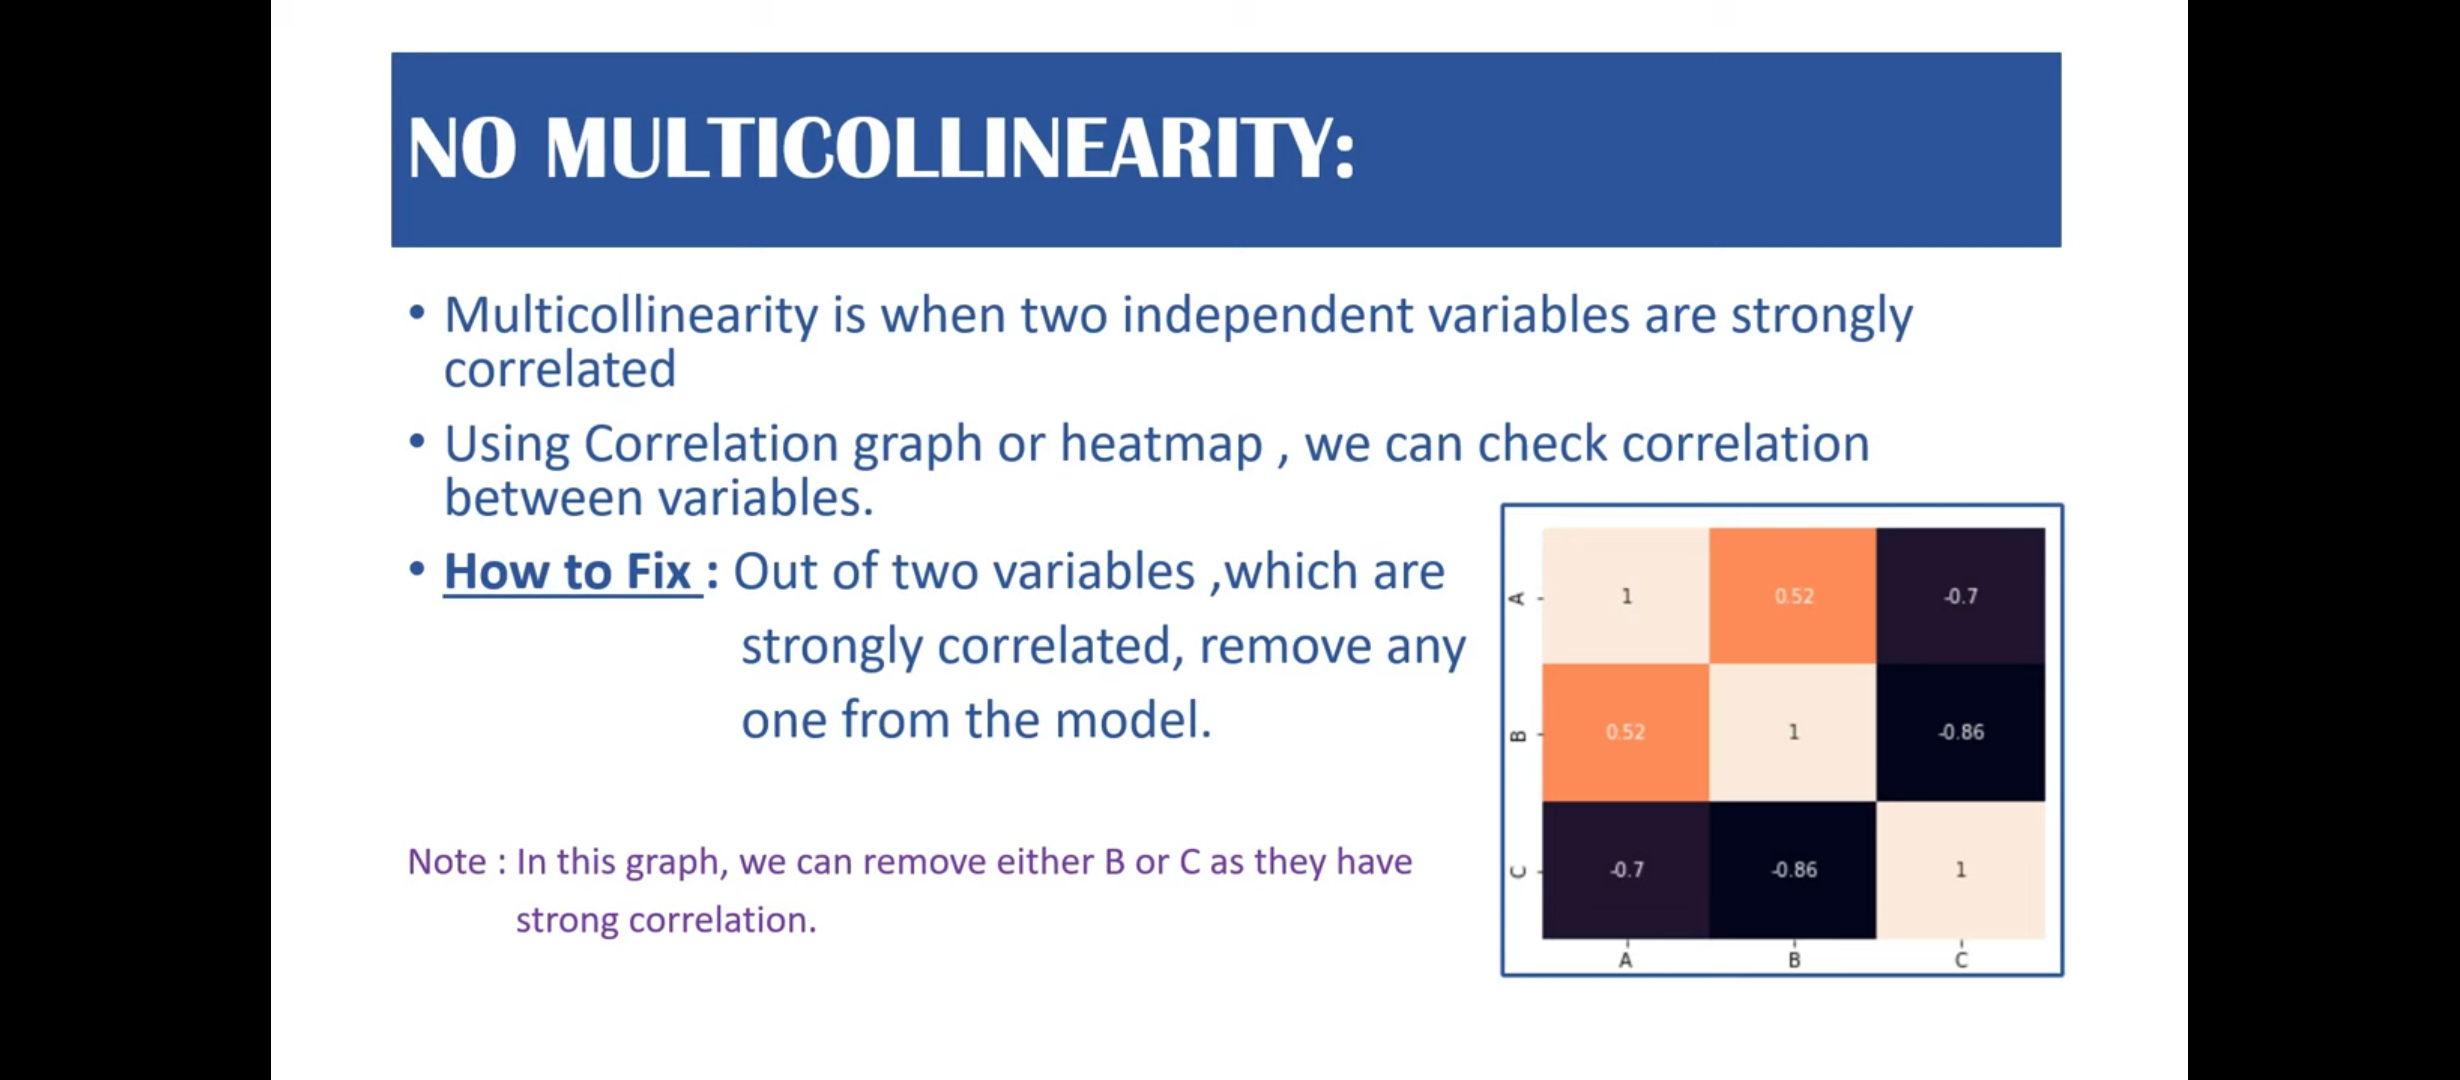

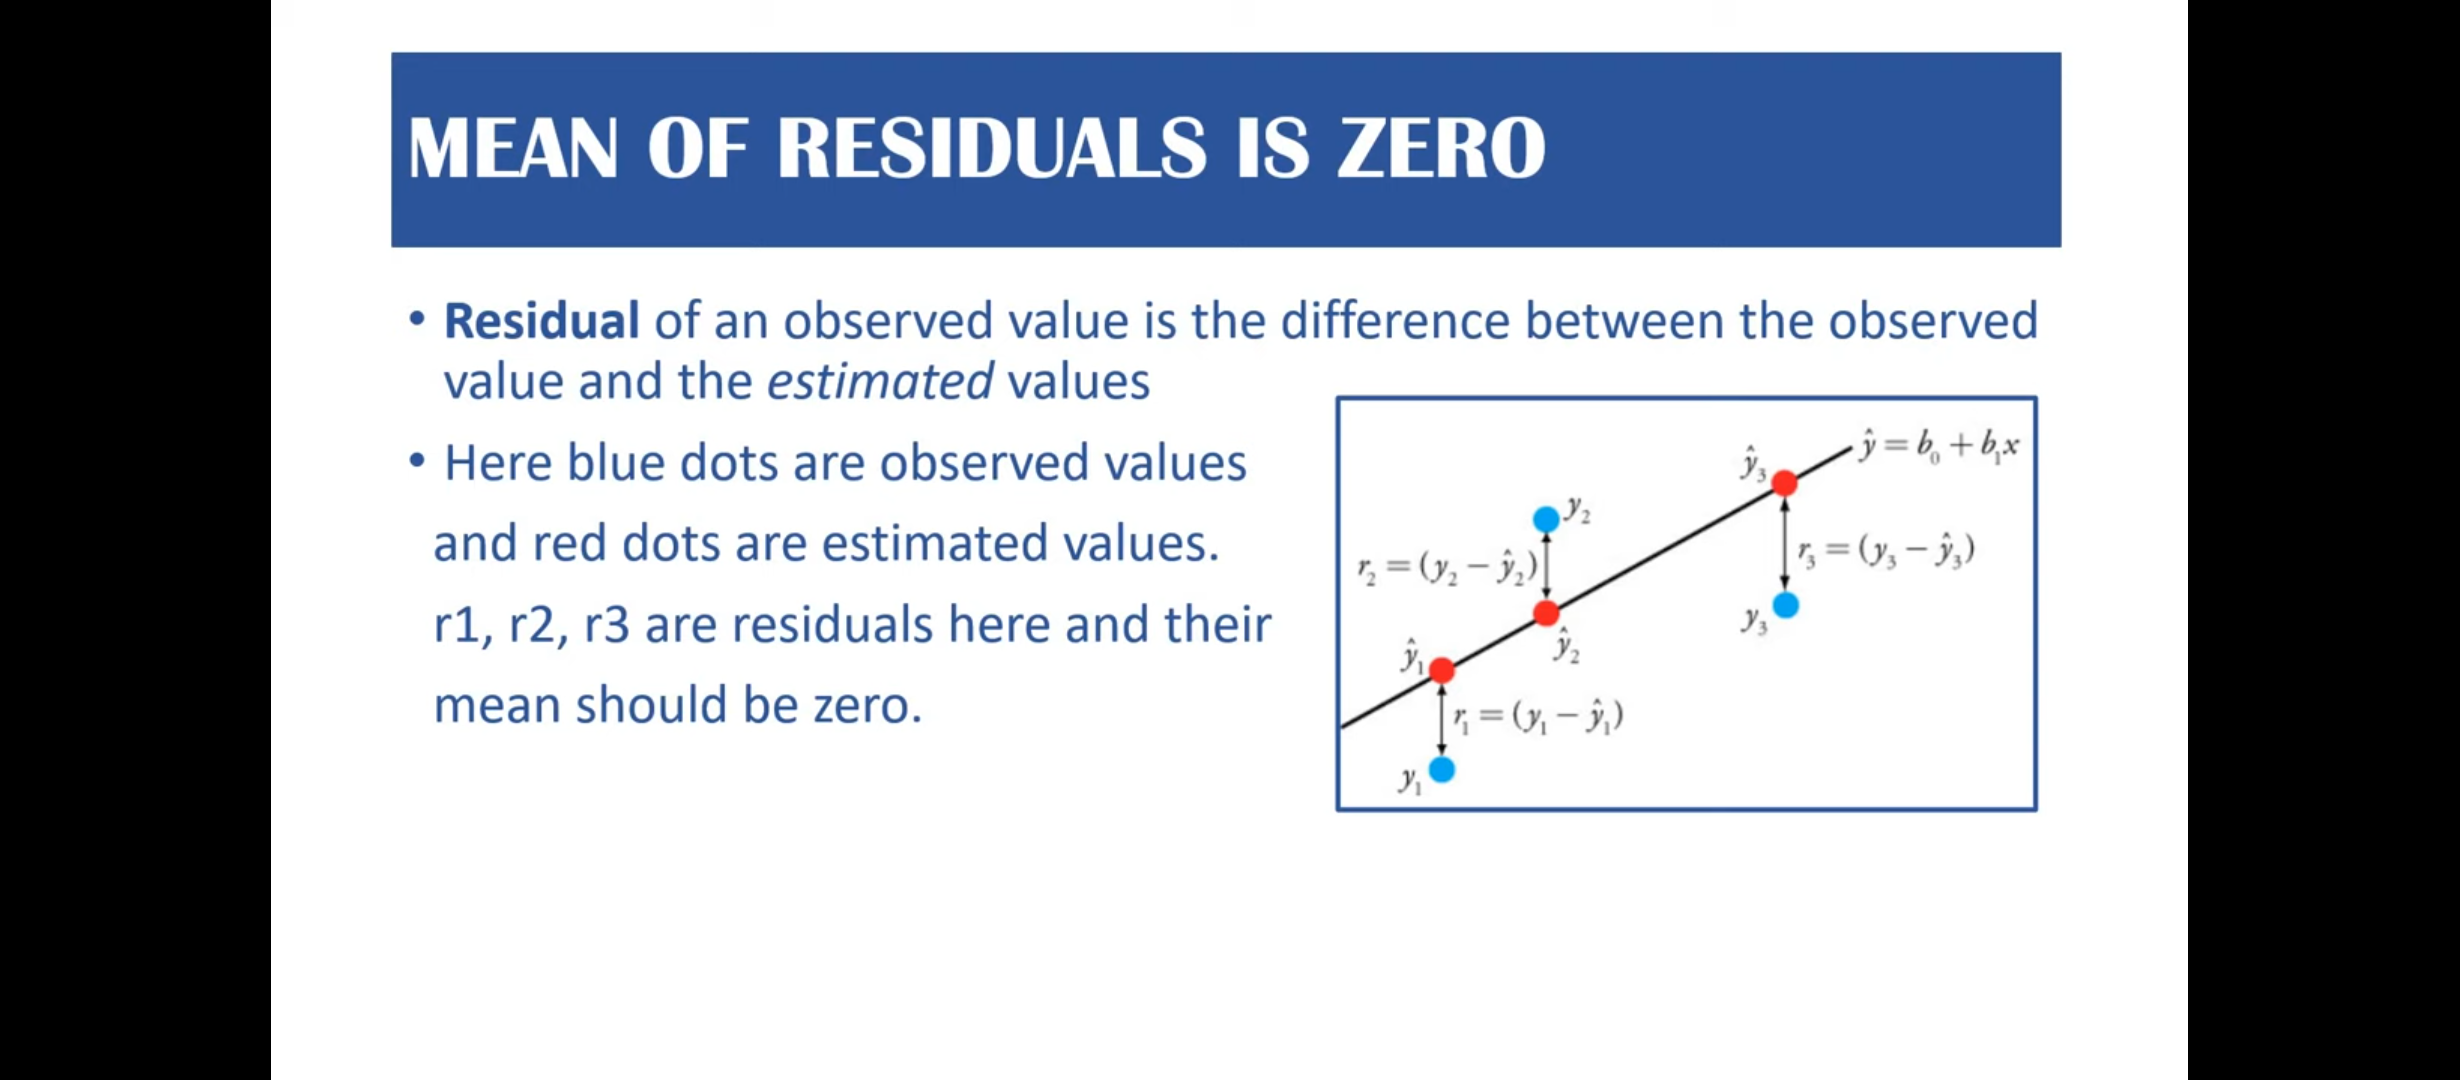

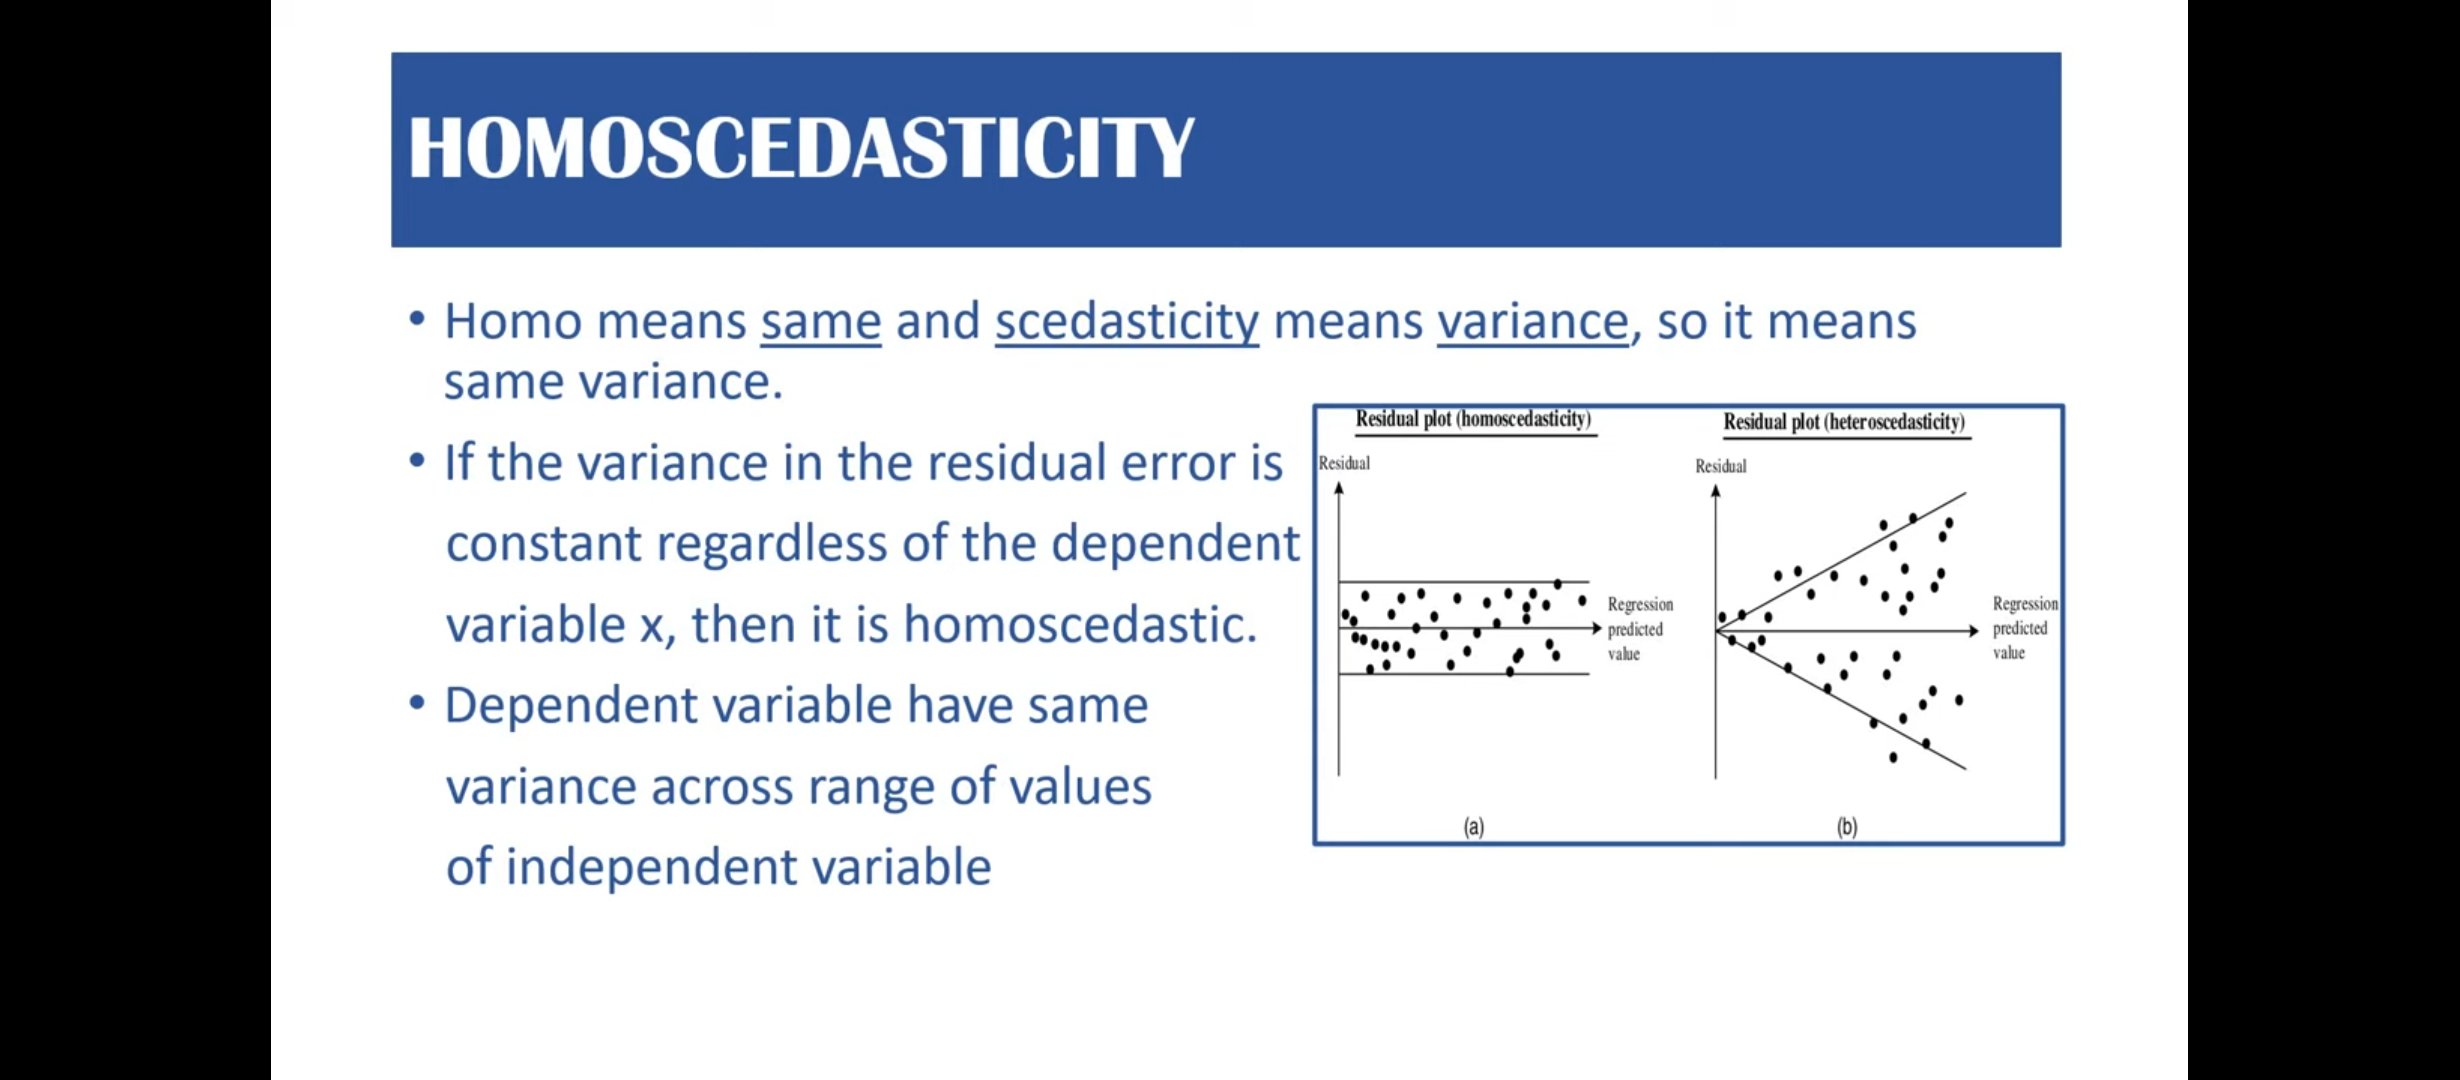

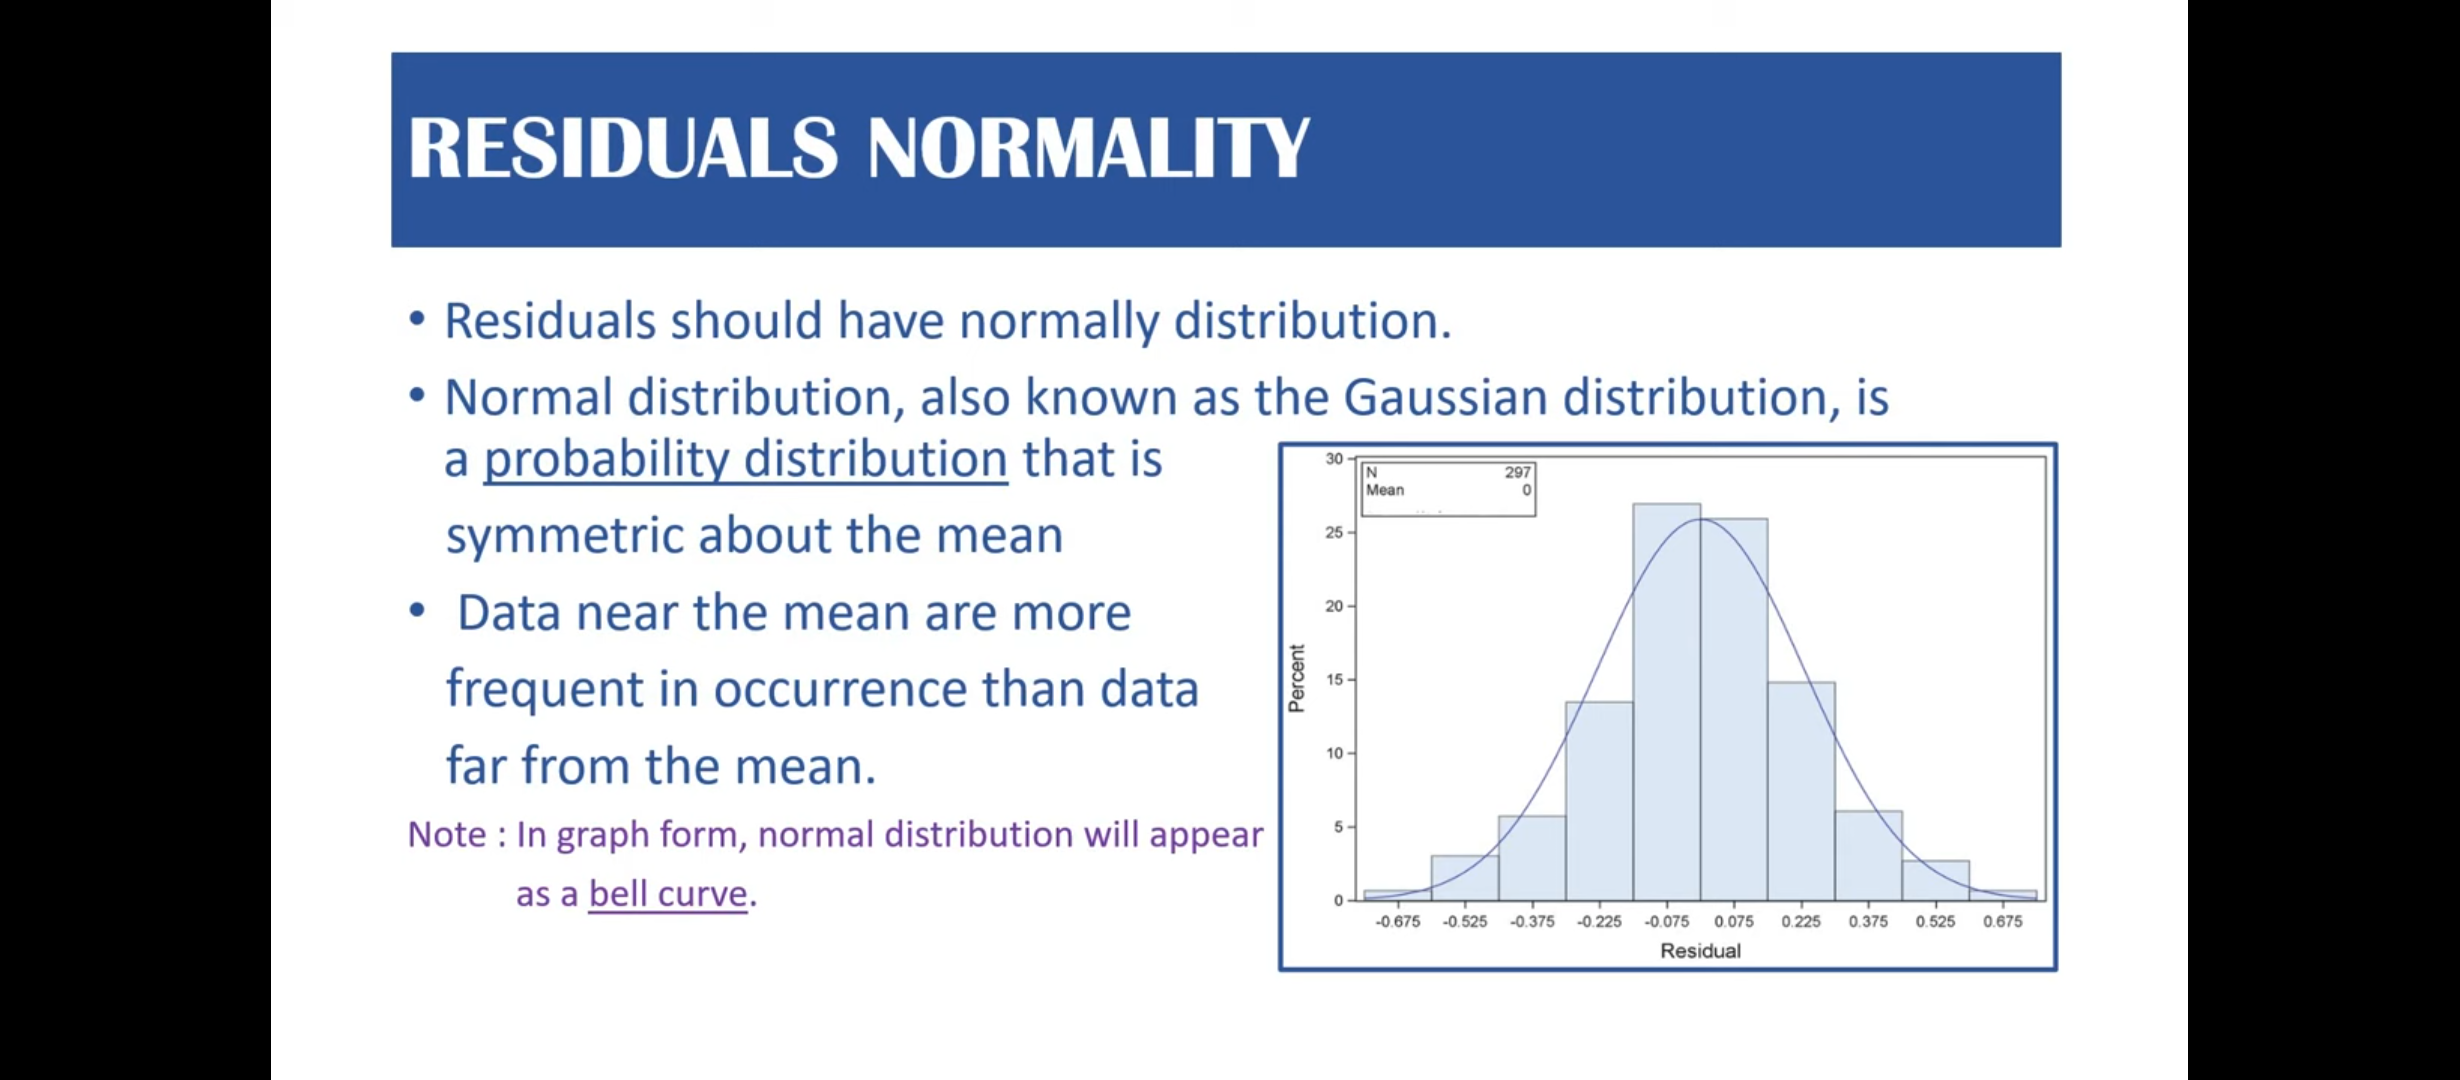

# Assumption Test by Python Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('Data_LinearRegression_Assumption.xlsx')
df.head(3)

feature1  feature2  feature3     target
0 -0.570563  1.420342  0.495580  -9.763182
1 -0.990563  0.556965  1.045064 -24.029355
2 -0.674728  0.150617  1.774645  45.616421

In [6]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred
residual

array([ 32.30806809,   0.46904443, -31.32809124,  22.08116144,
       -19.48224904,  14.53811846, -13.06186752,  -6.4005597 ,
        39.20256545, -29.29044906,   4.75248151, -19.57569445,
        -3.0065195 , -10.3924627 , -21.25888025,  11.55754461,
         8.62447468, -18.07049676,  -4.94076456,  35.61424035,
        20.12399832,  12.27393405, -26.31860141, -45.95327491,
         3.37760864, -11.49543562,  10.9718074 ,   6.30338945,
       -12.76318311,   8.71883535, -14.22352902,  15.87149439,
         8.46501917,  20.24567261, -20.1977093 ,  14.87670373,
        -3.57968224,  24.32042365, -18.93235423,   4.8939494 ,
        22.49334603, -37.72924312, -28.40177141, -41.04190332,
        11.18585659,   2.09365624, -12.96308959,  18.61567073,
       -22.47871086,  12.42202957,  -2.29240143,   7.67369719,
        20.01054442,   7.09808748,   0.77941307,  33.59206216,
       -23.14001768,  20.90778006,  -2.74463247,  10.58652756])

# 1. Linear Relationship

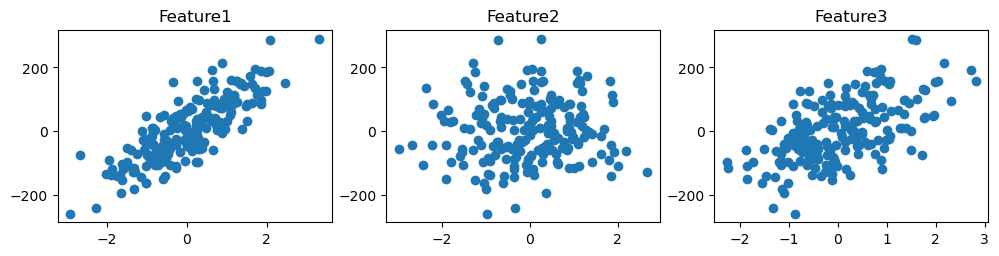

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

# 2. Multicollinearity

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [14]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T
#vip is approx 1 so we can take this, if vif is approx 5 then its a VIF case, 

feature1  feature2  feature3
vif  1.010326  1.009871   1.01395

<AxesSubplot:>

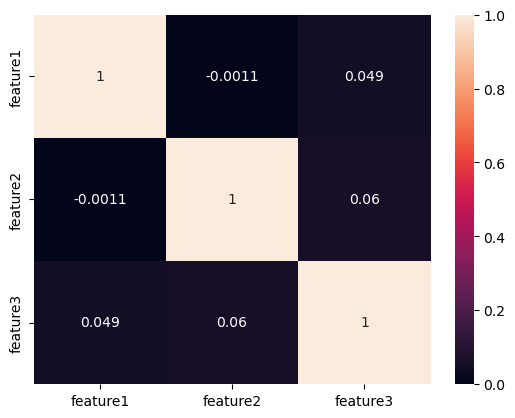

In [16]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)
# We will check only black boxes - means if there is co-relation between indenpent variables - if its touching -1 or 1 it means there
# are co-relation , we should use only one of two co-relation features

# 3. Normality of Residual

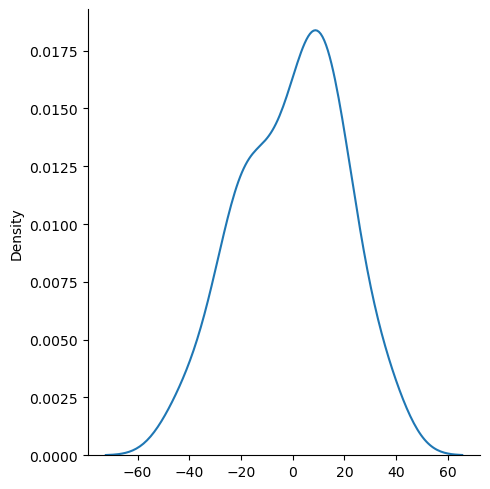

In [18]:
sns.displot(residual,kind='kde')
# if you plot the rediual in histogram - it should be in bell curve shape. Means most of the data point of residual should be near
# to mean value. Or you can say - VARIANCE should be near to zero - after + and - all of them

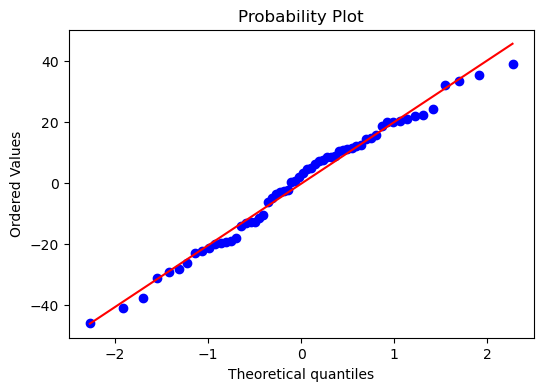

In [19]:
# QQ Plot
# another way to check the residual

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

# 4. Homoscedasticity

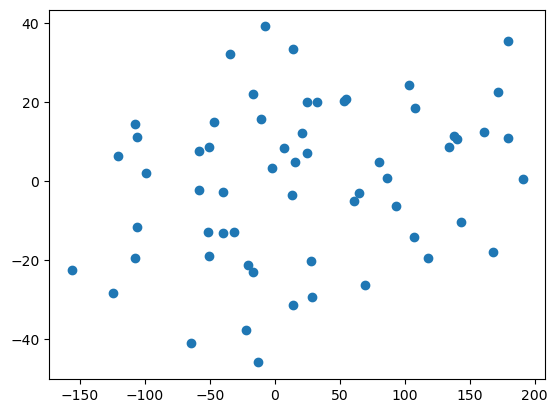

In [20]:
plt.scatter(y_pred,residual)

# 5. Autocorrelation of Residuals

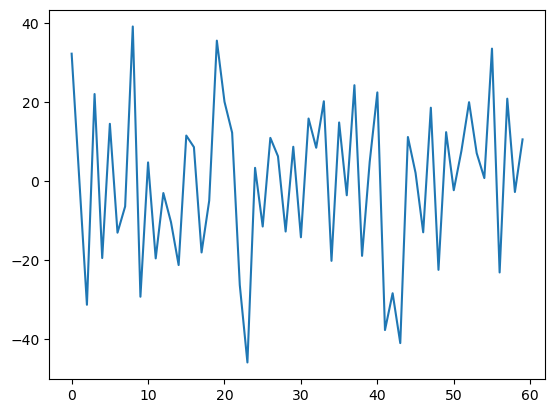

In [21]:
plt.plot(residual)